

---


### Import key librares and modules:

In [1]:

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



---


### Read multiple stocks data contained in **"stock_prices.csv"**:

In [2]:
# Import necessary module to upload files in Google Colab
from google.colab import files

# Prompt user to upload a file
uploaded = files.upload()

# Load the uploaded CSV file into a DataFrame
close_price_df = pd.read_csv('stock_prices.csv')

# Display the contents of the DataFrame to verify successful loading
close_price_df

Saving stock_prices.csv to stock_prices.csv


,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG
0,1/2/2014,19.898500,69.512543,75.620926,14.121004,27.855856,71.443314,45.640057,54.709999,20.879053,61.941517
1,1/3/2014,19.822001,69.473892,75.956062,13.835152,27.652653,72.086861,45.992889,54.560001,20.920183,61.872295
2,1/6/2014,19.681499,68.561180,75.327690,13.923512,27.960960,72.463608,46.259468,57.200001,20.940746,62.018425
3,1/7/2014,19.901501,68.785461,75.662811,13.996271,28.500000,74.001869,45.726311,57.919998,21.070980,62.618301
4,1/8/2014,20.096001,68.947906,74.850121,13.965082,28.559309,73.899841,46.157543,58.230000,21.214928,61.710812
...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,90.550003,233.059998,437.049988,42.500000,93.309998,177.839996,134.210007,114.709999,52.160000,152.470001
2253,12/13/2022,92.489998,235.490005,437.190002,42.540001,95.629997,179.210007,134.080002,120.150002,53.070000,152.240005
2254,12/14/2022,91.580002,234.479996,438.440002,42.820000,95.070000,179.759995,133.410004,121.589996,54.480000,152.839996
2255,12/15/2022,88.449997,230.660004,429.790008,42.380001,90.860001,177.490005,130.100006,116.150002,53.610001,151.110001




---


### Now, we need to calculate the percentage daily return:




In [3]:
# Perform this calculation on all stocks except for the first column which is "Date"
daily_returns_df = close_price_df.iloc[:, 1:].pct_change() * 100

# Replace NaN values (which occur after pct_change due to the first difference) with 0 to handle any missing data in the dataset.
daily_returns_df.replace(np.nan, 0, inplace=True)

# Output the DataFrame with daily percentage returns
daily_returns_df

,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.384451,-0.055602,0.443179,-2.024307,-0.729481,0.900780,0.773077,-0.274169,0.196992,-0.111753
2,-0.708814,-1.313748,-0.827284,0.638662,1.114930,0.522629,0.579608,4.838708,0.098293,0.236179
3,1.117807,0.327126,0.444884,0.522567,1.927829,2.122805,-1.152537,1.258737,0.621916,0.967255
4,0.977313,0.236162,-1.074095,-0.222838,0.208102,-0.137872,0.943073,0.535223,0.683156,-1.449240
...,...,...,...,...,...,...,...,...,...,...
2252,1.638800,2.538609,0.515165,2.607441,0.517070,1.194942,1.551152,-1.026749,0.850732,1.027036
2253,2.142457,1.042653,0.032036,0.094120,2.486336,0.770361,-0.096867,4.742396,1.744632,-0.150847
2254,-0.983886,-0.428897,0.285917,0.658201,-0.585588,0.306896,-0.499700,1.198498,2.656868,0.394108
2255,-3.417782,-1.629133,-1.972903,-1.027554,-4.428315,-1.262789,-2.481072,-4.474048,-1.596914,-1.131900




---


### Insert the 'Date' column from the original close_price_df into the daily_returns_df as the first column:

In [4]:
# The 'insert' method places the 'Date' column at index 0 (first column), with the column name "Date"
daily_returns_df.insert(0, "Date", close_price_df['Date'])

# Display the DataFrame with the added 'Date' column to verify the insertion
daily_returns_df

,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG
0,1/2/2014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1/3/2014,-0.384451,-0.055602,0.443179,-2.024307,-0.729481,0.900780,0.773077,-0.274169,0.196992,-0.111753
2,1/6/2014,-0.708814,-1.313748,-0.827284,0.638662,1.114930,0.522629,0.579608,4.838708,0.098293,0.236179
3,1/7/2014,1.117807,0.327126,0.444884,0.522567,1.927829,2.122805,-1.152537,1.258737,0.621916,0.967255
4,1/8/2014,0.977313,0.236162,-1.074095,-0.222838,0.208102,-0.137872,0.943073,0.535223,0.683156,-1.449240
...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,1.638800,2.538609,0.515165,2.607441,0.517070,1.194942,1.551152,-1.026749,0.850732,1.027036
2253,12/13/2022,2.142457,1.042653,0.032036,0.094120,2.486336,0.770361,-0.096867,4.742396,1.744632,-0.150847
2254,12/14/2022,-0.983886,-0.428897,0.285917,0.658201,-0.585588,0.306896,-0.499700,1.198498,2.656868,0.394108
2255,12/15/2022,-3.417782,-1.629133,-1.972903,-1.027554,-4.428315,-1.262789,-2.481072,-4.474048,-1.596914,-1.131900




---


### An interactive line plot where each stock's prices are plotted over time, allowing for easy exploration of trends.

In [5]:
# Define a function to plot financial data interactively using Plotly Express
def plot_financial_data(df, title):

    # Create an empty figure with a title
    fig = px.line(title=title)

    # Loop through each stock (excluding the 'Date' column) and add a line for each
    for i in df.columns[1:]:  # Skip the 'Date' column
        # Add scatter plot (line) for each stock price
        fig.add_scatter(x=df['Date'], y=df[i], name=i)

        # Update trace with thicker line width
        fig.update_traces(line_width=5)

        # Set the background color to white
        fig.update_layout({'plot_bgcolor': "white"})

    # Display the interactive plot
    fig.show()
# Plot closing prices using plotly Express using the same pre-defined function "plot_financial_data"
plot_financial_data(close_price_df, 'Adjusted Closing Prices [$]')



---


### Plot a heatmap to visualize correlations between daily returns:

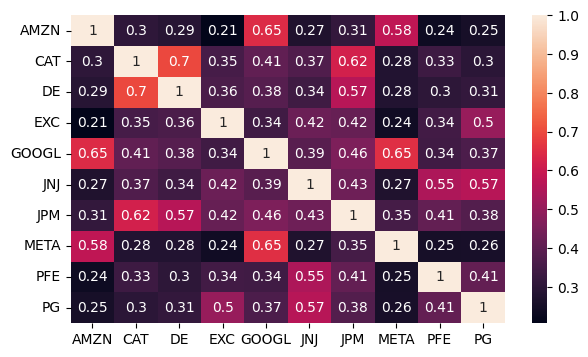

In [6]:
# Set the figure size to make the heatmap more readable
plt.figure(figsize=(7, 4))

# Drop the 'Date' column from the daily_returns_df
# .corr() calculates the correlation matrix between the remaining columns (daily returns)
sns.heatmap(daily_returns_df.drop(columns=['Date']).corr(), annot=True)

# Display the heatmap
plt.show()

Notice a strong positive correlations between Caterpillar and John Deere - both into heavy equipment and machinery.  
Same for META and Google - both into Tech and Cloud Computing



---


###Define a function to scale stock prices based on their initial starting price

In [49]:
def price_scaling(raw_prices_df):
    """
    Function to scale stock prices so that all prices start at a value of 1.

    Parameters:
    raw_prices_df (DataFrame): A pandas DataFrame containing raw stock prices with dates as the first column.

    Returns:
    DataFrame: A new DataFrame with scaled stock prices, where each stock's prices start from 1.
    """

    # Create a copy of the original DataFrame to avoid modifying it
    scaled_prices_df = raw_prices_df.copy()

    # Loop through each stock (excluding the first column, which is assumed to be 'Date')
    for i in raw_prices_df.columns[1:]:
        # Scale each stock's prices by dividing by the initial price (the first price in the series)
        scaled_prices_df[i] = raw_prices_df[i] / raw_prices_df[i][0]

    return scaled_prices_df

# Make a copy of the close_price_df to create a working DataFrame for scaling
portfolio_df = close_price_df.copy()

# This will set the starting value of all stocks to 1 for easier comparison
scaled_df = price_scaling(portfolio_df)

# Display the scaled DataFrame to verify the transformation
scaled_df

,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG
0,1/2/2014,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1/3/2014,0.996155,0.999444,1.004432,0.979757,0.992705,1.009008,1.007731,0.997258,1.001970,0.998882
2,1/6/2014,0.989095,0.986314,0.996122,0.986014,1.003773,1.014281,1.013572,1.045513,1.002955,1.001242
3,1/7/2014,1.000151,0.989540,1.000554,0.991167,1.023124,1.035812,1.001890,1.058673,1.009192,1.010926
4,1/8/2014,1.009925,0.991877,0.989807,0.988958,1.025253,1.034384,1.011338,1.064339,1.016087,0.996275
...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,4.550594,3.352776,5.779485,3.009701,3.349744,2.489246,2.940619,2.096692,2.498198,2.461515
2253,12/13/2022,4.648089,3.387734,5.781336,3.012534,3.433030,2.508422,2.937770,2.196125,2.541782,2.457802
2254,12/14/2022,4.602357,3.373204,5.797866,3.032362,3.412927,2.516121,2.923090,2.222446,2.609314,2.467489
2255,12/15/2022,4.445058,3.318250,5.683480,3.001203,3.261792,2.484347,2.850566,2.123012,2.567645,2.439559




---


###Create an array that holds random portfolio weights

In [50]:
# Define a function to generate random portfolio weights that sum to 1
import random
def generate_portfolio_weights(n):
    """
    Function to generate random portfolio weights that sum to 1.

    Parameters:
    n (int): The number of assets in the portfolio.

    Returns:
    list: A list of portfolio weights that sum to 1.
    """

    # Create a list of n random numbers
    weights = []
    for i in range(n):
        weights.append(random.random())

    # Convert the list to a numpy array and normalize it so the weights sum to 1
    weights = np.array(weights) / np.sum(weights)

    return weights




---


### Loop through the stock names along with a counter "i" using enumerate() method

In [51]:
# The counter "i" starts at 0 and is used as an index to access elements in the "weights" list
# The goal is to calculate the value of each stock in the portfolio by applying the corresponding weight

# Initial investment amount
initial_investment = 1000000

# Loop through each stock, skipping the date column (hence columns[1:])
for i, stock in enumerate(scaled_df.columns[1:]):
    # Multiply each stock's scaled price by its weight and the initial investment to calculate the position value
    portfolio_df[stock] = weights[i] * scaled_df[stock] * initial_investment

# Round the portfolio values to 1 decimal point for better readability
portfolio_df.round(1)

,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG
0,1/2/2014,159794.5,32968.9,60109.9,179289.3,166569.5,22605.0,139151.2,157968.6,13880.4,67662.8
1,1/3/2014,159180.1,32950.6,60376.3,175659.9,165354.4,22808.7,140227.0,157535.5,13907.7,67587.1
2,1/6/2014,158051.8,32517.7,59876.8,176781.8,167198.0,22927.9,141039.7,165158.1,13921.4,67746.8
3,1/7/2014,159818.5,32624.1,60143.2,177705.6,170421.3,23414.6,139414.2,167237.1,14008.0,68402.1
4,1/8/2014,161380.5,32701.1,59497.2,177309.6,170775.9,23382.3,140729.0,168132.1,14103.7,67410.7
...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,727159.7,110537.4,347404.2,539607.1,557965.2,56269.5,409190.7,331211.4,34676.0,166552.9
2253,12/13/2022,742738.8,111689.9,347515.5,540114.9,571838.1,56703.0,408794.3,346918.7,35281.0,166301.7
2254,12/14/2022,735431.1,111210.9,348509.1,543670.0,568489.5,56877.0,406751.6,351076.5,36218.3,166957.1
2255,12/15/2022,710295.7,109399.1,341633.4,538083.5,543315.0,56158.8,396659.8,335369.2,35639.9,165067.3




---


### Define a function that calculates the daily value of a portfolio, its total value, and daily returns

In [59]:
def asset_allocation(df, weights, initial_investment):
    """
    Function to calculate the daily value of each stock in a portfolio, the total portfolio value,
    and the percentage daily return based on an initial investment and random weights.

    Parameters:
    df (DataFrame): A pandas DataFrame containing the closing prices of stocks with the first column being 'Date'.
    weights (list): A list of weights for each stock in the portfolio, where the sum of weights equals 1.
    initial_investment (float): The total amount of money to invest in the portfolio.

    Returns:
    DataFrame: A DataFrame that includes:
               (1) Daily value of each individual stock
               (2) Total daily value of the portfolio
               (3) Percentage daily return of the portfolio
    """

    # Create a copy of the original DataFrame to preserve the 'Date' column and scale stock prices
    portfolio_df = df.copy()

    # Scale stock prices to start at 1 using the price_scaling function
    scaled_df = price_scaling(df)

    # Loop through each stock (excluding 'Date') and calculate its daily position value
    for i, stock in enumerate(scaled_df.columns[1:]):  # Skip the 'Date' column
        portfolio_df[stock] = scaled_df[stock] * weights[i] * initial_investment

    # Sum up the daily value of all stocks and store it in a new column 'Portfolio Value [$]'
    portfolio_df['Portfolio Value [$]'] = portfolio_df.iloc[:, 1:].sum(axis=1)

    # Calculate the portfolio's percentage daily return and replace NaNs with zeros
    portfolio_df['Portfolio Daily Return [%]'] = portfolio_df['Portfolio Value [$]'].pct_change() * 100
    portfolio_df.replace(np.nan, 0, inplace=True)

    return portfolio_df


###Generate random weights

In [60]:
# Let's obtain the number of stocks under consideration (note that we ignored the "Date" column)
n = len(close_price_df.columns)-1

# Let's generate random weights
print('Number of stocks under consideration = {}'.format(n))
weights = generate_portfolio_weights(n).round(6)
print('Portfolio weights = {}'.format(weights))

# Let's test out the "asset_allocation" function
portfolio_df = asset_allocation(close_price_df, weights, 1000000)
portfolio_df.round(2)

Number of stocks under consideration = 10
Portfolio weights = [0.127709 0.059634 0.120013 0.015283 0.048576 0.109981 0.149802 0.212441
 0.120671 0.035891]


,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG,Portfolio Value [$],Portfolio Daily Return [%]
0,1/2/2014,127709.00,59634.00,120013.00,15283.00,48576.00,109981.00,149802.00,212441.00,120671.00,35891.00,1000001.00,0.00
1,1/3/2014,127218.02,59600.84,120544.87,14973.63,48221.65,110971.69,150960.08,211858.55,120908.71,35850.89,1001108.94,0.11
2,1/6/2014,126316.28,58817.84,119547.62,15069.26,48759.28,111551.66,151835.06,222109.77,121027.56,35935.56,1010969.90,0.99
3,1/7/2014,127728.26,59010.25,120079.47,15148.00,49699.28,113919.68,150085.11,224905.55,121780.25,36283.15,1018638.99,0.76
4,1/8/2014,128976.56,59149.61,118789.71,15114.25,49802.71,113762.62,151500.52,226109.30,122612.20,35757.32,1021574.77,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,581151.85,199939.45,693613.30,45997.26,162717.18,273769.79,440510.57,445423.27,301460.00,88346.25,3232928.93,0.89
2253,12/13/2022,593602.78,202024.13,693835.51,46040.55,166762.88,275878.80,440083.86,466547.01,306719.37,88212.98,3279707.88,1.45
2254,12/14/2022,587762.40,201157.65,695819.30,46343.59,165786.34,276725.46,437884.76,472138.56,314868.49,88560.64,3287047.21,0.22
2255,12/15/2022,567673.97,197880.53,682091.47,45867.39,158444.80,273231.00,427020.53,451014.86,309840.31,87558.22,3200623.07,-2.63




---


### Function to simulate portfolio performance and calculate key metrics

In [61]:
def simulation_engine(weights, initial_investment):
    """
    Simulates portfolio performance based on random weights and calculates portfolio statistical metrics.

    Parameters:
    weights (list): A list of portfolio weights for each stock (must sum to 1).
    initial_investment (float): The total initial amount of money to invest in the portfolio.

    Returns:
    tuple: A tuple containing the following portfolio metrics:
           - Expected portfolio return
           - Expected volatility (risk)
           - Sharpe ratio
           - Final portfolio value in dollars
           - Return on investment (percentage)
    """

    # Perform asset allocation using the "asset_allocation" function with the given weights
    portfolio_df = asset_allocation(close_price_df, weights, initial_investment)

    # Calculate the return on the investment
    # ROI = ((Final Portfolio Value - Initial Portfolio Value) / Initial Portfolio Value) * 100
    return_on_investment = ((portfolio_df['Portfolio Value [$]'][-1:] -
                             portfolio_df['Portfolio Value [$]'][0]) /
                             portfolio_df['Portfolio Value [$]'][0]) * 100

    # Calculate daily percentage returns for each stock in the portfolio
    # Exclude 'Date', 'Portfolio Value [$]', and 'Portfolio Daily Return [%]' columns for stock-level calculations
    portfolio_daily_return_df = portfolio_df.drop(columns=['Date', 'Portfolio Value [$]', 'Portfolio Daily Return [%]'])
    portfolio_daily_return_df = portfolio_daily_return_df.pct_change(1)  # Calculate percentage daily changes

    # Calculate the expected portfolio return
    # Formula: sum(weights * average daily return of each stock) * 252 (annualized)
    expected_portfolio_return = np.sum(weights * portfolio_daily_return_df.mean()) * 252

    # Calculate the portfolio volatility (risk)
    # Portfolio risk takes into account asset correlations, using covariance between stocks
    covariance = portfolio_daily_return_df.cov() * 252  # Annualize covariance matrix
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))  # Portfolio standard deviation (risk)

    # Define the risk-free rate (assumed to be 5%)
    rf = 0.05

    # Calculate the Sharpe ratio (risk-adjusted return)
    # Formula: (Expected portfolio return - Risk-free rate) / Portfolio volatility
    sharpe_ratio = (expected_portfolio_return - rf) / expected_volatility

    # Return key portfolio metrics: expected return, volatility, Sharpe ratio, final portfolio value, ROI
    return (expected_portfolio_return, expected_volatility, sharpe_ratio,
            portfolio_df['Portfolio Value [$]'][-1:].values[0], return_on_investment.values[0])

# Testing the "simulation_engine" function with random portfolio weights
# Define the initial investment amount
initial_investment = 1000000

# Run the simulation engine and print portfolio metrics
portfolio_metrics = simulation_engine(weights, initial_investment)



In [55]:
print('Expected Portfolio Annual Return = {:.2f}%'.format(portfolio_metrics[0] * 100))
print('Portfolio Standard Deviation (Volatility) = {:.2f}%'.format(portfolio_metrics[1] * 100))
print('Sharpe Ratio = {:.2f}'.format(portfolio_metrics[2]))
print('Portfolio Final Value = ${:.2f}'.format(portfolio_metrics[3]))
print('Return on Investment = {:.2f}%'.format(portfolio_metrics[4]))


Expected Portfolio Annual Return = 16.46%
Portfolio Standard Deviation (Volatility) = 18.93%
Sharpe Ratio = 0.61
Portfolio Final Value = $3239948.70
Return on Investment = 224.00%




---


### Montecarlo simulation

In [56]:
# Set the number of simulation runs
sim_runs = 1000
initial_investment = 1000000

# Placeholder to store all weights
weights_runs = np.zeros((sim_runs, n))

# Placeholder to store all Sharpe ratios
sharpe_ratio_runs = np.zeros(sim_runs)

# Placeholder to store all expected returns
expected_portfolio_returns_runs = np.zeros(sim_runs)

# Placeholder to store all volatility values
volatility_runs = np.zeros(sim_runs)

# Placeholder to store all returns on investment
return_on_investment_runs = np.zeros(sim_runs)

# Placeholder to store all final portfolio values
final_value_runs = np.zeros(sim_runs)

for i in range(sim_runs):
    # Generate random weights
    weights = generate_portfolio_weights(n)
    # Store the weights
    weights_runs[i,:] = weights

    # Call "simulation_engine" function and store Sharpe ratio, return and volatility
    # Note that asset allocation is performed using the "asset_allocation" function
    expected_portfolio_returns_runs[i], volatility_runs[i], sharpe_ratio_runs[i], final_value_runs[i], return_on_investment_runs[i] = simulation_engine(weights, initial_investment)
    print("Simulation Run = {}".format(i))
    print("Weights = {}, Final Value = ${:.2f}, Sharpe Ratio = {:.2f}".format(weights_runs[i].round(3), final_value_runs[i], sharpe_ratio_runs[i]))
    print('\n')


Simulation Run = 0
Weights = [0.129 0.157 0.101 0.039 0.018 0.05  0.151 0.017 0.16  0.18 ], Final Value = $3258530.30, Sharpe Ratio = 0.63


Simulation Run = 1
Weights = [0.133 0.182 0.001 0.131 0.142 0.125 0.125 0.005 0.02  0.135], Final Value = $3104758.95, Sharpe Ratio = 0.61


Simulation Run = 2
Weights = [0.156 0.002 0.087 0.028 0.11  0.15  0.112 0.069 0.157 0.129], Final Value = $3167050.78, Sharpe Ratio = 0.62


Simulation Run = 3
Weights = [0.149 0.067 0.068 0.039 0.032 0.186 0.127 0.064 0.119 0.149], Final Value = $3102051.46, Sharpe Ratio = 0.62


Simulation Run = 4
Weights = [0.111 0.075 0.258 0.194 0.022 0.008 0.085 0.144 0.084 0.019], Final Value = $3685702.67, Sharpe Ratio = 0.67


Simulation Run = 5
Weights = [0.086 0.124 0.058 0.084 0.041 0.026 0.126 0.158 0.137 0.16 ], Final Value = $3000168.99, Sharpe Ratio = 0.59


Simulation Run = 6
Weights = [0.004 0.021 0.236 0.229 0.175 0.004 0.228 0.004 0.041 0.058], Final Value = $3586837.92, Sharpe Ratio = 0.63


Simulation Ru

In [57]:
# Return the index of the maximum Sharpe ratio (Best simulation run)
sharpe_ratio_runs.argmax()

716

In [58]:
# Return the maximum Sharpe ratio value
sharpe_ratio_runs.max()

0.6963784132651788

In [62]:
# Obtain the portfolio weights that correspond to the maximum Sharpe ratio (Golden set of weights)
weights_runs[sharpe_ratio_runs.argmax(), :]

array([0.16857827, 0.10374957, 0.25305296, 0.02609202, 0.00066076,
       0.06506804, 0.00858299, 0.0521315 , 0.1031092 , 0.21897468])

In [37]:
# Return Sharpe ratio, volatility corresponding to the best weights allocation (maximum Sharpe ratio)
optimal_portfolio_return, optimal_volatility, optimal_sharpe_ratio, highest_final_value, optimal_return_on_investment = simulation_engine(weights_runs[sharpe_ratio_runs.argmax(), :], initial_investment)

In [38]:
print('Best Portfolio Metrics Based on {} Monte Carlo Simulation Runs:'.format(sim_runs))
print('  - Portfolio Expected Annual Return = {:.02f}%'.format(optimal_portfolio_return * 100))
print('  - Portfolio Standard Deviation (Volatility) = {:.02f}%'.format(optimal_volatility * 100))
print('  - Sharpe Ratio = {:.02f}'.format(optimal_sharpe_ratio))
print('  - Final Value = ${:.02f}'.format(highest_final_value))
print('  - Return on Investment = {:.02f}%'.format(optimal_return_on_investment))

Best Portfolio Metrics Based on 1000 Monte Carlo Simulation Runs:
  - Portfolio Expected Annual Return = 17.91%
  - Portfolio Standard Deviation (Volatility) = 18.37%
  - Sharpe Ratio = 0.70
  - Final Value = $3730047.02
  - Return on Investment = 273.00%


###Portfolio optimization

In [34]:
# Create a DataFrame that contains volatility, return, and Sharpe ratio for all simualation runs
sim_out_df = pd.DataFrame({'Volatility': volatility_runs.tolist(), 'Portfolio_Return': expected_portfolio_returns_runs.tolist(), 'Sharpe_Ratio': sharpe_ratio_runs.tolist() })
sim_out_df

,Volatility,Portfolio_Return,Sharpe_Ratio
0,0.176772,0.149112,0.560675
1,0.178935,0.163276,0.633060
2,0.173867,0.159772,0.631355
3,0.192920,0.176548,0.655959
4,0.188288,0.160486,0.586791
...,...,...,...
995,0.178533,0.151993,0.571283
996,0.176514,0.154842,0.593959
997,0.196078,0.173763,0.631192
998,0.198403,0.180437,0.657434


In [39]:
# Plot volatility vs. return for all simulation runs
# Highlight the volatility and return that corresponds to the highest Sharpe ratio
import plotly.graph_objects as go
fig = px.scatter(sim_out_df, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio', size = 'Sharpe_Ratio', hover_data = ['Sharpe_Ratio'] )
fig.update_layout({'plot_bgcolor': "white"})
fig.show()


# Use this code if Sharpe ratio is negative
# fig = px.scatter(sim_out_df, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio', hover_data = ['Sharpe_Ratio'] )


In [40]:
# Let's highlight the point with the highest Sharpe ratio
fig = px.scatter(sim_out_df, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio', size = 'Sharpe_Ratio', hover_data = ['Sharpe_Ratio'] )
fig.add_trace(go.Scatter(x = [optimal_volatility], y = [optimal_portfolio_return], mode = 'markers', name = 'Optimal Point', marker = dict(size=[40], color = 'red')))
fig.update_layout(coloraxis_colorbar = dict(y = 0.7, dtick = 5))
fig.update_layout({'plot_bgcolor': "white"})
fig.show()